Best neighborhood will be determined by a weighted average of values taked from each of the datasets. The count of fires per neighborhood will be given the greatest weights, followed by daily traffic, and finally the number of steps. The final counts will be used to find the safest, and therefore best, neighborhood. 

In [ ]:
!pip install --upgrade geopandas

In [9]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

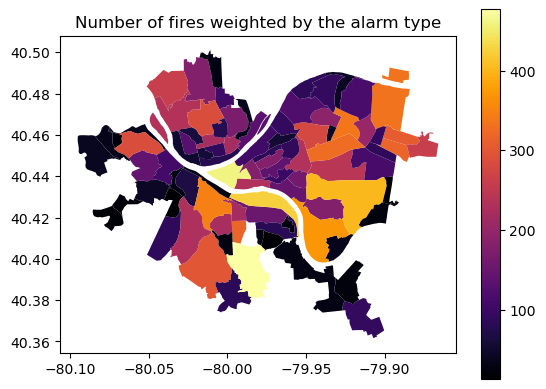

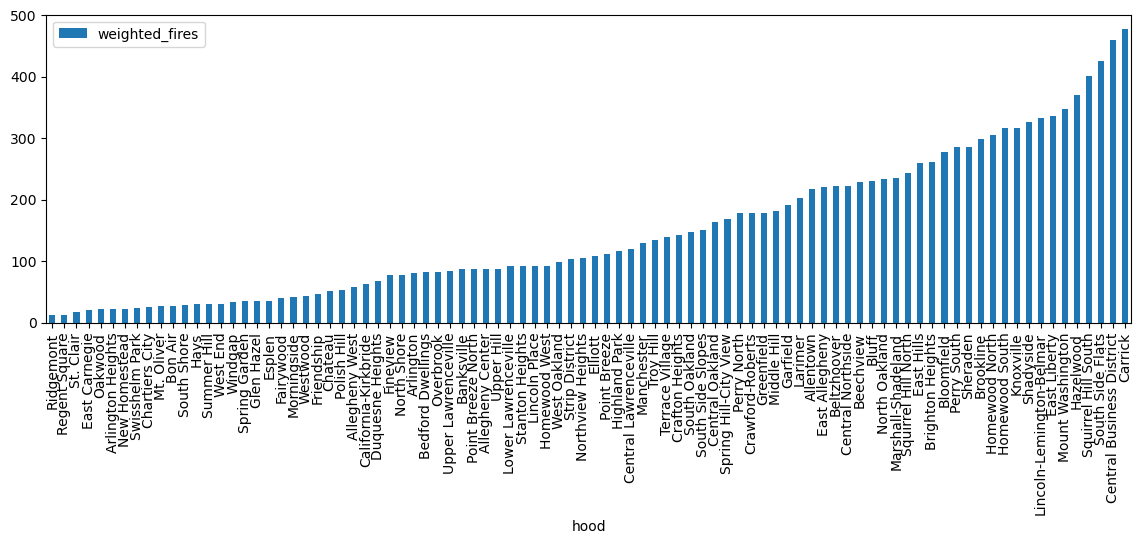

In [10]:
fires=pd.read_csv(r"fires/fireincidents.csv")
fires=fires[pd.isna(fires['neighborhood'])==False]
fires['neighborhood'].replace("Mount Oliver Borough","Mt. Oliver",inplace=True)
neighborhoods=gpd.read_file(r"neighborhoods/Neighborhoods_.shp")
weighted_fires=pd.DataFrame({'hood':fires['neighborhood'].unique()})
weighted_fires['weighted_fires'] = weighted_fires['hood'].apply(
    lambda nb:sum( fires[fires['neighborhood']==nb]["alarms"]+1)
)
fire_map = neighborhoods.merge(weighted_fires)
fire_map.plot(
    column='weighted_fires', legend=True,cmap="inferno",missing_kwds={"color": "tgrey"})
plt.title("Number of fires weighted by the alarm type");
weighted_fires.sort_values("weighted_fires").plot(kind='bar',x='hood',figsize=(14,4));

{'Polish Hill': 15894.0, 'Squirrel Hill South': 79302.0, 'Central Northside': 5945.0, 'Bluff': 5365.0, 'Crafton Heights': 11500.0, 'Shadyside': 66132.0, 'Highland Park': 23471.0, 'North Shore': 10350.0, 'East Liberty': 51247.0, 'Mount Washington': 47336.0, 'Brookline': 39144.0, 'Squirrel Hill North': 35452.0, 'Bloomfield': 43101.0, 'Larimer': 37713.0, 'Friendship': 4887.0, 'Point Breeze': 31242.0, 'Regent Square': 16729.0, 'Central Lawrenceville': 13499.0, 'Knoxville': 7646.0, 'Central Oakland': 11306.0, 'Strip District': 29075.0, 'Greenfield': 7158.0, 'Windgap': 3062.0, 'Beechview': 4255.0, 'Upper Hill': 2860.0, 'Stanton Heights': 16272.0, 'Manchester': 21293.0, 'South Side Slopes': 26447.0, 'Perry North': 19114.0, 'North Oakland': 23821.0, 'East Hills': 16253.0, 'Duquesne Heights': 5831.0, 'Sheraden': 8532.0, 'Morningside': 14345.0, 'Central Business District': 2305.0, 'St. Clair': 2436.0, 'Perry South': 12075.0, 'Elliott': 4028.0, 'Carrick': 13787.0, 'Westwood': 15400.0, 'Allegheny 

<Axes: xlabel='neighborhood'>

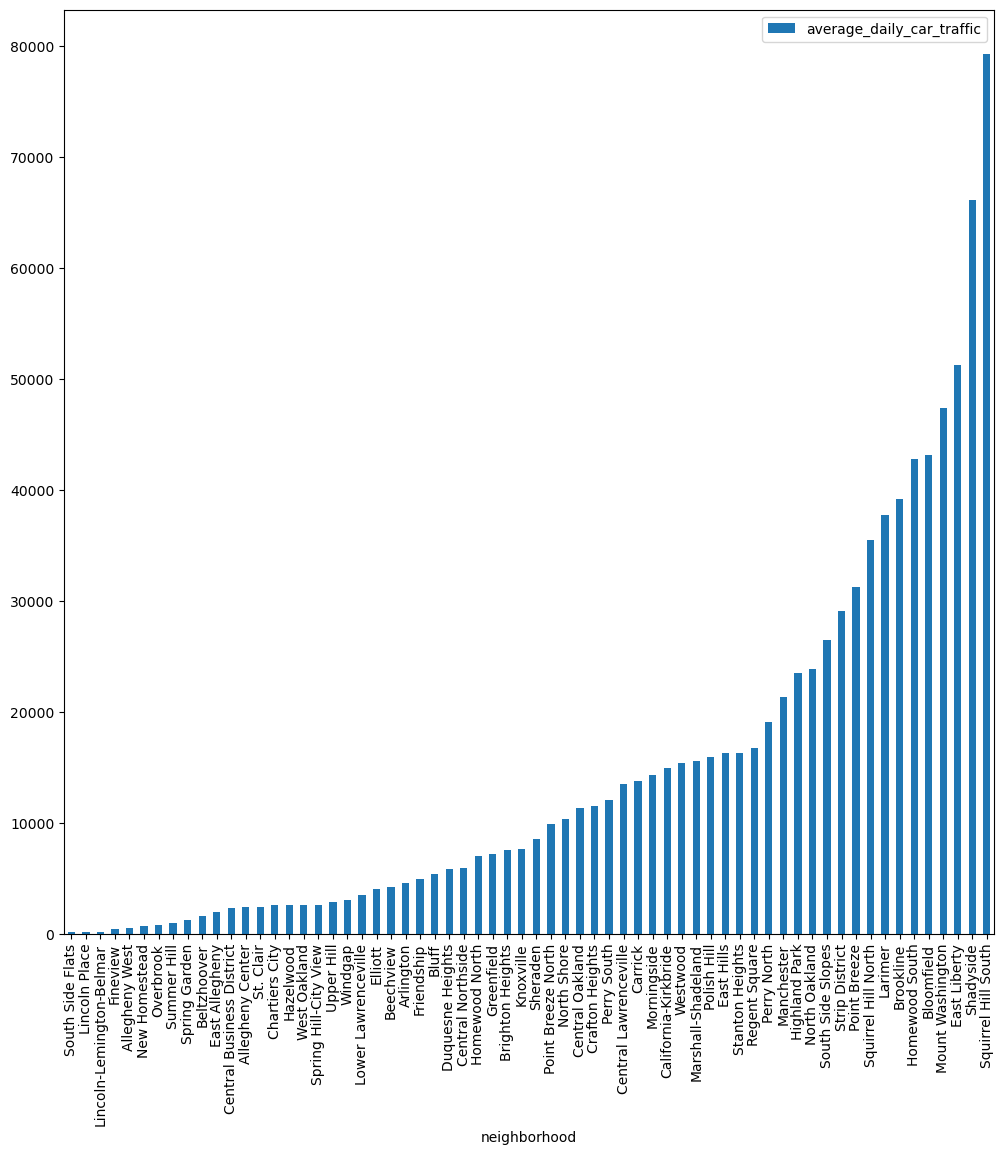

In [11]:

trafRaw = pd.read_csv("PittTraffic.csv")
trafRaw.head()
traf = trafRaw[trafRaw['average_daily_car_traffic'].notna()]

neighborhoods = dict()
i = 0
for name in traf.iloc[:, 18]:
    if name not in neighborhoods:
        if traf.iat[i, 6]!= 0:
            neighborhoods[name] = traf.iat[i, 6]
            #print("here\n")
        else: 
            neighborhoods[name] = 0
            #print("or here\n")
    else:
        if traf.iat[i, 6]!= 0:
            neighborhoods[name] += traf.iat[i, 6]
            #print("or maybe\n")
        else:
            neighborhoods[name] += 0
            #print("pls here\n")
    i += 1
print(neighborhoods)

num_cars = traf.groupby("neighborhood").sum()['average_daily_car_traffic']
num_cars = pd.DataFrame(num_cars)
num_cars = num_cars.sort_values('average_daily_car_traffic', ascending=True)
num_cars.plot.bar(figsize=(12,12))

C:\Users\liamb\AppData\Local\Temp\ipykernel_23636\3913038597.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  steps = pd.read_csv("steps.csv", index_col="neighborhood", parse_dates=True)


{'Mount Oliver Borough': 1, 'Strip District': 1, 'Chartiers City': 1, 'Glen Hazel': 1, 'Larimer': 1, 'Bluff': 1, 'Manchester': 1, 'East Liberty': 1, 'Bon Air': 2, 'St. Clair': 2, 'Windgap': 2, 'East Carnegie': 2, 'Shadyside': 2, 'South Shore': 2, 'Point Breeze North': 2, 'Central Northside': 3, 'Ridgemont': 3, 'Esplen': 3, 'North Shore': 3, 'Allegheny West': 3, 'North Oakland': 4, 'East Allegheny': 4, 'Crawford-Roberts': 4, 'Regent Square': 4, 'Central Oakland': 5, 'West End': 5, 'Terrace Village': 5, 'Oakwood': 5, 'Bedford Dwellings': 6, 'West Oakland': 6, 'Allegheny Center': 6, 'Banksville': 7, 'Morningside': 7, 'Squirrel Hill North': 7, 'Mt. Oliver': 7, 'Bloomfield': 7, 'Lincoln Place': 7, 'Central Business District': 7, 'Knoxville': 8, 'Point Breeze': 8, 'South Side Flats': 8, 'California-Kirkbride': 9, 'Homewood North': 9, 'Crafton Heights': 9, 'East Hills': 9, 'Central Lawrenceville': 9, 'South Oakland': 10, 'Middle Hill': 11, 'Upper Lawrenceville': 12, 'Lincoln-Lemington-Belmar'

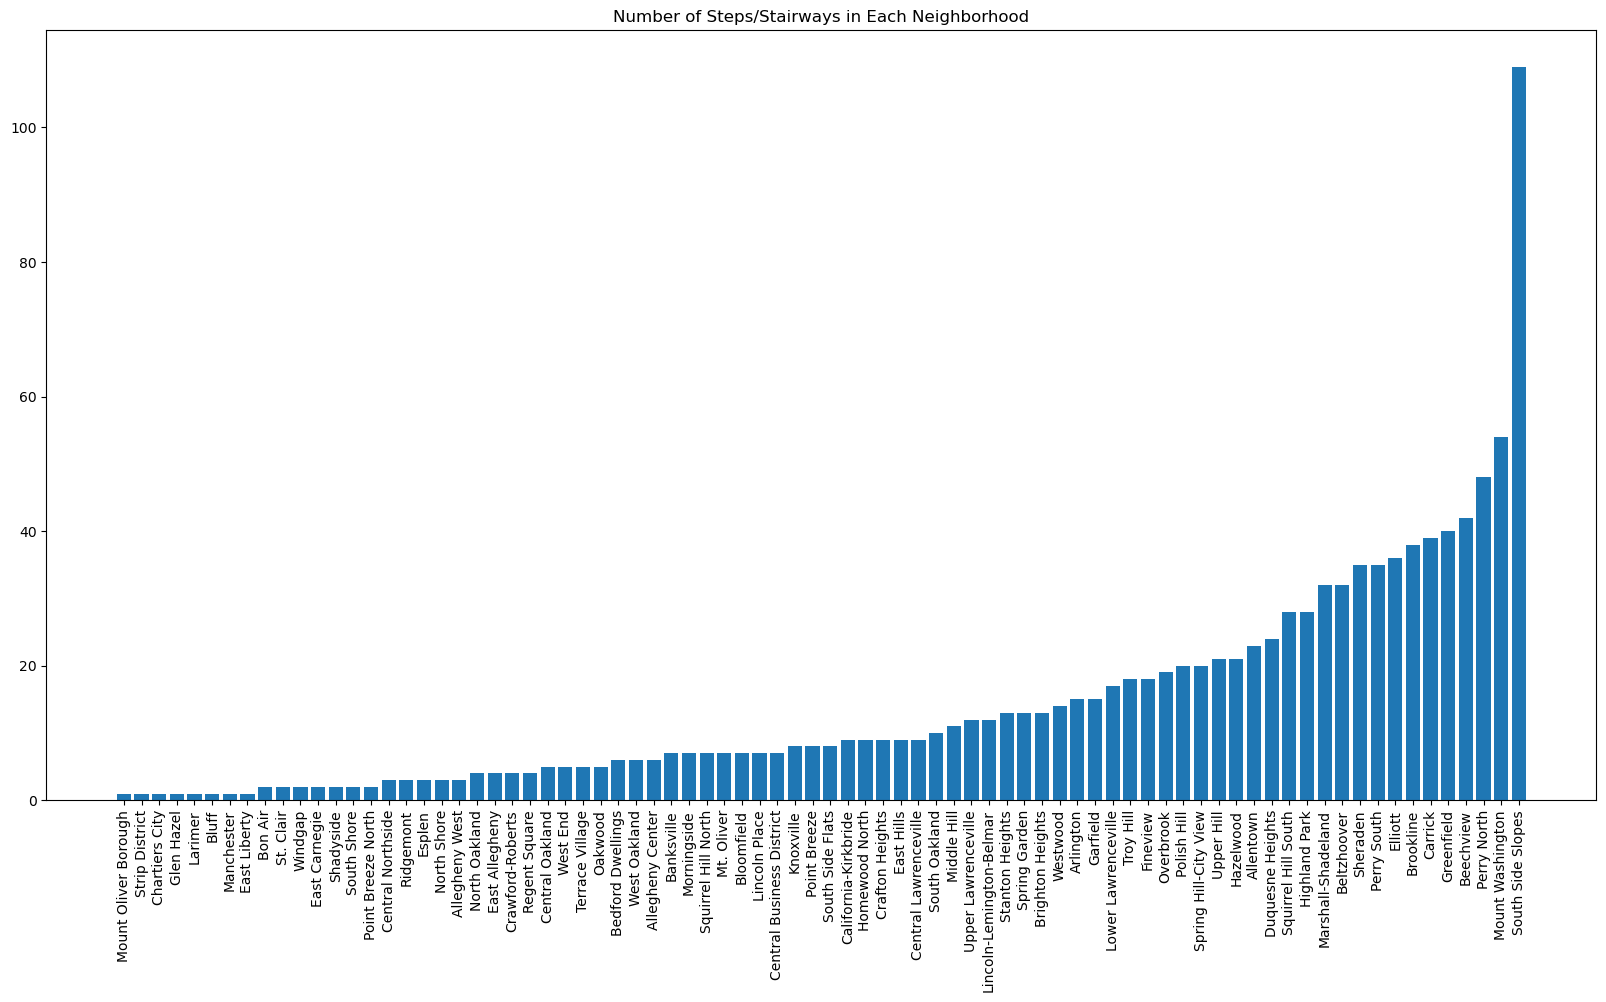

In [12]:
steps = pd.read_csv("steps.csv", index_col="neighborhood", parse_dates=True)

neighborhoods = dict()

for name in steps.index:
    if name not in neighborhoods:
        neighborhoods[name] = 1
    else:
        neighborhoods[name] += 1

sorted_neighborhoods = dict(sorted(neighborhoods.items(), key=lambda item: item[1]))

print(sorted_neighborhoods)

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(sorted_neighborhoods.keys(), sorted_neighborhoods.values())
ax.set_title("Number of Steps/Stairways in Each Neighborhood")
plt.xticks(rotation=90)
plt.show()

In [13]:
combined=pd.merge(pd.merge(fire_map,
            pd.Series(sorted_neighborhoods).to_frame().reset_index().rename(columns={'index':'hood',0:'steps'})),num_cars.reset_index().rename(columns={'neighborhood':'hood'}))

Text(0.5, 1.0, 'Number of Steps/Stairways')

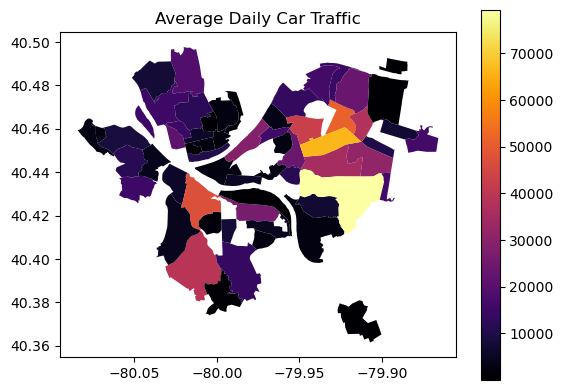

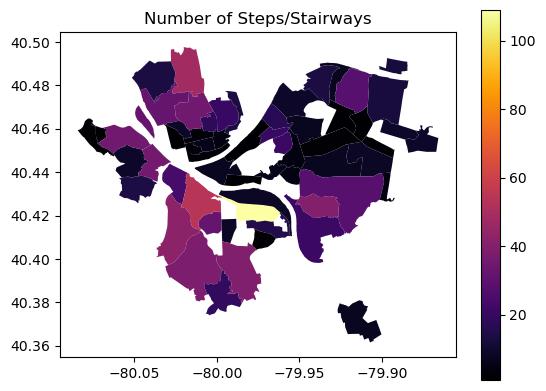

In [14]:

combined.plot(column='average_daily_car_traffic', legend=True,cmap="inferno",missing_kwds={"color": "tgrey"})
plt.title("Average Daily Car Traffic")
combined.plot(column='steps', legend=True,cmap="inferno",missing_kwds={"color": "tgrey"})
plt.title("Number of Steps/Stairways")

In [15]:
from IPython.display import clear_output, display
from functools import cache
import numpy as np
df=combined.dropna(subset=['steps','average_daily_car_traffic','weighted_fires'])
def minimax(col):
    return (col-col.min())/(col.max()-col.min())
def z_score(col):
    return (col-col.mean())/col.std()
def identity(col):
    return col
def log(col):
    return col.apply(lambda x: np.log(x+1))
df.set_index('hood',inplace=True)
df.rename(columns={'average_daily_car_traffic':'Average Daily Car Traffic','steps':'Number of Steps','weighted_fires':'Response Weighted Fires'},inplace=True)
for metric in ['Average Daily Car Traffic','Number of Steps','Response Weighted Fires']:
    for scaling in [minimax,z_score,identity,log]:
        df[f'{scaling.__name__} {metric}']=scaling(df[metric])




In [16]:

def plot_weights(car_weight,steps_weight,fire_weight,sort_score=False,normalization="minimax"):
    clear_output(wait=True)
    global df    
    metrics=['Average Daily Car Traffic','Number of Steps','Response Weighted Fires']
    weights=car_weight,steps_weight,fire_weight
    for metric,weight in zip(metrics,weights):
        df[f'Weighted {normalization} {metric}']=df[f'{normalization} {metric}']*weight
    df['score']=df[[f'Weighted {normalization} {metric}' for metric in metrics]].sum(axis=1)
    if sort_score:
        df=df.sort_values('score',ascending=False)
    else:
        df=df.sort_index()
    fig, (ax0,ax1) = plt.subplots(1,2)
    df[[f'Weighted {normalization} {metric}' for metric in metrics]].plot(kind='barh',figsize=(14,8),stacked=True,ax=ax0)
    ax0.set_title("Weights for Normalized Features")
    ax0.legend(loc='lower left', bbox_to_anchor=(-0.05,- 0.2))
    ax1.set_title("Total Score")
    df.plot(column='score', legend=True,missing_kwds={"color": "tgrey"},ax=ax1)
widgets.interact(plot_weights,
                 car_weight=widgets.FloatSlider(min=0, max=10, step=0.01, value=1),
                 steps_weight=widgets.FloatSlider(min=0, max=10, step=0.01, value=1),
                 fire_weight=widgets.FloatSlider(min=0, max=10, step=0.01, value=1),
                 sort_score=widgets.Checkbox(value=False),
                 normalization=widgets.Dropdown(options=["minimax","z_score","identity","log"],value="minimax")
                 );

interactive(children=(FloatSlider(value=1.0, description='car_weight', max=10.0, step=0.01), FloatSlider(value…